# Importing packages and dataset

In [ ]:
#Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import missingno as msno
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Importing train and test data

train = pd.read_csv("/content/Train.csv")
test = pd.read_csv("/content/Test.csv")

# Exploratory data analysis

In [ ]:
#Shape of the data

print("Train dataset has {} samples and {} attributes".format(*train.shape))
print("Test dataset has {} samples and {} attributes".format(*test.shape))

Train dataset has 412 samples and 24 attributes
Test dataset has 177 samples and 23 attributes


In [ ]:
#Display first five rows of the data

train.head()

,ID,Cough,Shortness of breath,Fatigue,body aches,Headache,Loss of taste,family history,Loss of smell,Nausea,...,Region,Misc Symptom 2,Misc Symptom 3,Misc Symptom 4,Misc Symptom 5,Misc Symptom 6,Misc Symptom 7,Pre-existing symptoms,Age,Variant
0,309,2,3,2,0,2.0,0,Yes,2,0.0,...,Americas,0,1,2,0,0,2,NaN,31,Variant 1
1,486,2,2,1,0,0.0,0,Yes,1,0.0,...,Europe,1,0,0,3,0,0,NaN,22,Variant 2
2,199,3,3,3,0,2.0,0,Yes,2,0.0,...,Europe,3,0,2,0,0,0,?,18,Variant 1
3,495,2,1,3,0,2.0,0,Yes,0,0.0,...,Europe,0,0,0,0,0,0,NaN,23,Variant 3
4,401,3,2,2,0,0.0,0,Yes,2,0.0,...,Americas,0,0,0,0,0,0,NaN,56,Variant 1


We have 23 feature columns and target variable Variant which has 6 classes. Family history and Region are categorical variables, while the others are numerical.

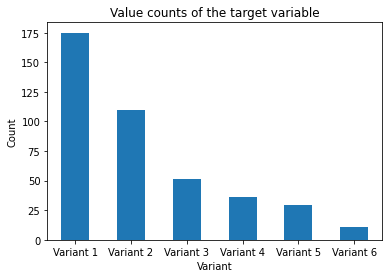

In [ ]:
#Most frequent variant 

train.Variant.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Variant")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

We have 6 variants namely Variant 1, Variant 2, Variant 2, Variant 4, Variant 5 and Variant 6. Most of the people have Variant 1 disease as per the dataset.

In [ ]:
#Percentage of the variants in the dataset

n=len(train)
var_1=len(train[train['Variant']=='Variant 1'])
var_2=len(train[train['Variant']=='Variant 2'])
var_3=len(train[train['Variant']=='Variant 3'])
var_4=len(train[train['Variant']=='Variant 4'])
var_5=len(train[train['Variant']=='Variant 5'])
var_6=len(train[train['Variant']=='Variant 6'])

print("% of Variant 1 in the train dataset: ",var_1*100/n)
print("% of Variant 2 in the train dataset: ",var_2*100/n)
print("% of Variant 3 in the train dataset: ",var_3*100/n)
print("% of Variant 4 in the train dataset: ",var_4*100/n)
print("% of Variant 5 in the train dataset: ",var_5*100/n)
print("% of Variant 6 in the train dataset: ",var_6*100/n)

% of Variant 1 in the train dataset:  42.47572815533981
% of Variant 2 in the train dataset:  26.699029126213592
% of Variant 3 in the train dataset:  12.37864077669903
% of Variant 4 in the train dataset:  8.737864077669903
% of Variant 5 in the train dataset:  7.038834951456311
% of Variant 6 in the train dataset:  2.6699029126213594


In [ ]:
#Numerical columns
num = ['Cough','Shortness of breath','Fatigue','body aches','Headache','Loss of taste','Loss of smell','Nausea','Diarrhea','Misc Symptom 1','Misc Symptom 2','Misc Symptom 3','Misc Symptom 4','Misc Symptom 5','Misc Symptom 6','Misc Symptom 7','Congestion','Sore throat','Age']

In [ ]:
#Finding correlation between numerical columns
corr_df = train[num]
cor = corr_df.corr(method='pearson')
print(cor)

                        Cough  Shortness of breath   Fatigue  body aches  \
Cough                1.000000             0.298867  0.080428   -0.073539   
Shortness of breath  0.298867             1.000000  0.249152   -0.111692   
Fatigue              0.080428             0.249152  1.000000   -0.104900   
body aches          -0.073539            -0.111692 -0.104900    1.000000   
Headache             0.077186             0.226543  0.361515    0.175966   
Loss of taste        0.071215             0.233624  0.270639   -0.052594   
Loss of smell        0.152401             0.222474 -0.048803   -0.114333   
Nausea              -0.242958            -0.318407 -0.152196    0.037918   
Diarrhea             0.042366            -0.142044 -0.346456    0.020545   
Misc Symptom 1       0.107844             0.262237  0.309640   -0.051384   
Misc Symptom 2       0.039162             0.246800  0.244528   -0.064115   
Misc Symptom 3      -0.007581             0.170773  0.286391   -0.101373   
Misc Symptom

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


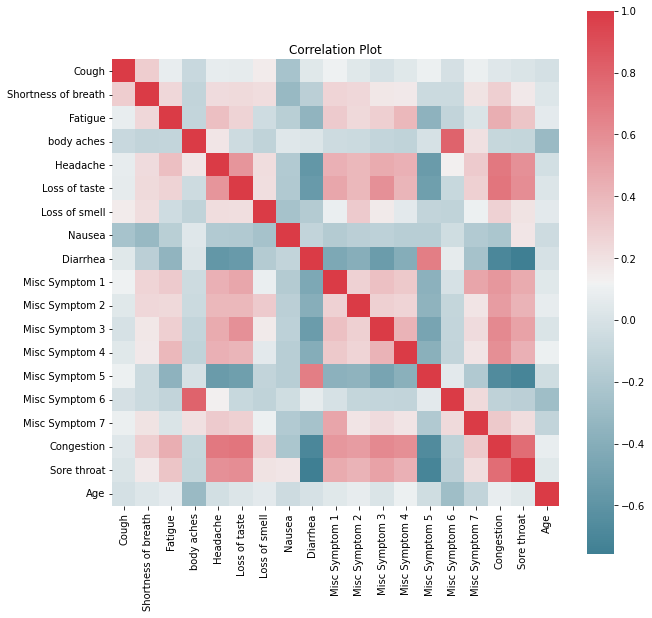

In [ ]:
fig, ax =plt.subplots(figsize=(10, 10))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

Considering the number of features, there's no strong correlation between any two variables except Congestion and Sorethroat which has a strong positive correlation of 0.754.

Since there is no strong evidence of data redundancy, I keep all the features 


In [ ]:
#Chi square test to find the correlation between the features
#Variant and Region 

csq=chi2_contingency(pd.crosstab(train['Variant'], train['Region']))
print("P-value: ",csq[1])

P-value:  7.491770149439979e-73


In [ ]:
#Chi square test between variant and family history

csq1=chi2_contingency(pd.crosstab(train['Variant'], train['family history']))
print("P-value: ",csq1[1])

P-value:  5.255074255448435e-15


P values for features Region and family history are low. So we can reject our Null Hypothesis which is these features are independent and have no relationship with target variable

So these features contribute by providing some information

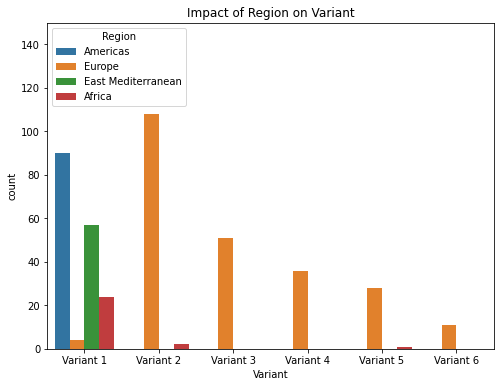

In [ ]:
#Visualize the Region and Variant features 

fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Variant', data=train, hue='Region')
ax.set_ylim(0,150)
plt.title("Impact of Region on Variant")
plt.show()

From the grpah, we can understand that

1.   Variant 1 is present in all the regions, America has the most while Europe being the least. 
2.   Europe region has all the Variants. 
3.   Variant 3, Variant 4 and Variant 6 is present only in the Europe region
4.   The America and East Meditteranean regions have only Variant 1 type.





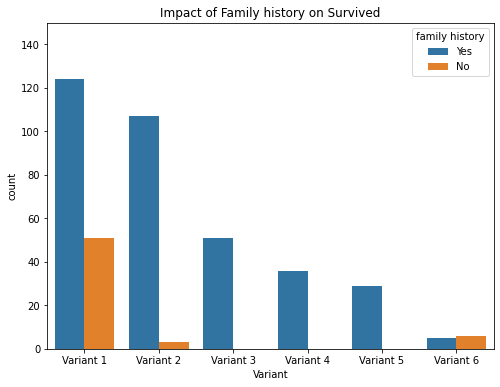

In [ ]:
#Visualize the Family history and Variant features 

fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Variant', data=train, hue='family history')
ax.set_ylim(0,150)
plt.title("Impact of Family history on Survived")
plt.show()

By considering the above graph, we can say that people having family history have a high chance of having any of the 6 variants.

Irrespective of family history people are attacked by Variant 1, Variant 2 and Variant 6. Whereas, Variant 3, Variant 4 and Variant 5 only for people having a family history.

# Missing data handling

In [ ]:
#Finding the number of NaN values in the dataset

train.isna().sum()

ID                         0
Cough                      0
Shortness of breath        0
Fatigue                    0
body aches                 0
Headache                  10
Loss of taste              0
family history             0
Loss of smell              0
Nausea                    10
Diarrhea                   1
Misc Symptom 1             1
Congestion                 0
Sore throat                0
Region                     0
Misc Symptom 2             0
Misc Symptom 3             0
Misc Symptom 4             0
Misc Symptom 5             0
Misc Symptom 6             0
Misc Symptom 7             0
Pre-existing symptoms    404
Age                        0
Variant                    0
dtype: int64

As we can see, some of the columns in the dataset consist of missing values



*   The headache feature has 10 missing values
*   The Nausea feature has 10 missing values
*   The Diarrhea feature has 1 missing value
*   The Misc Symptom 1 feature has 1 missing value
*   The pre-existing symptoms columns has 404 missing values





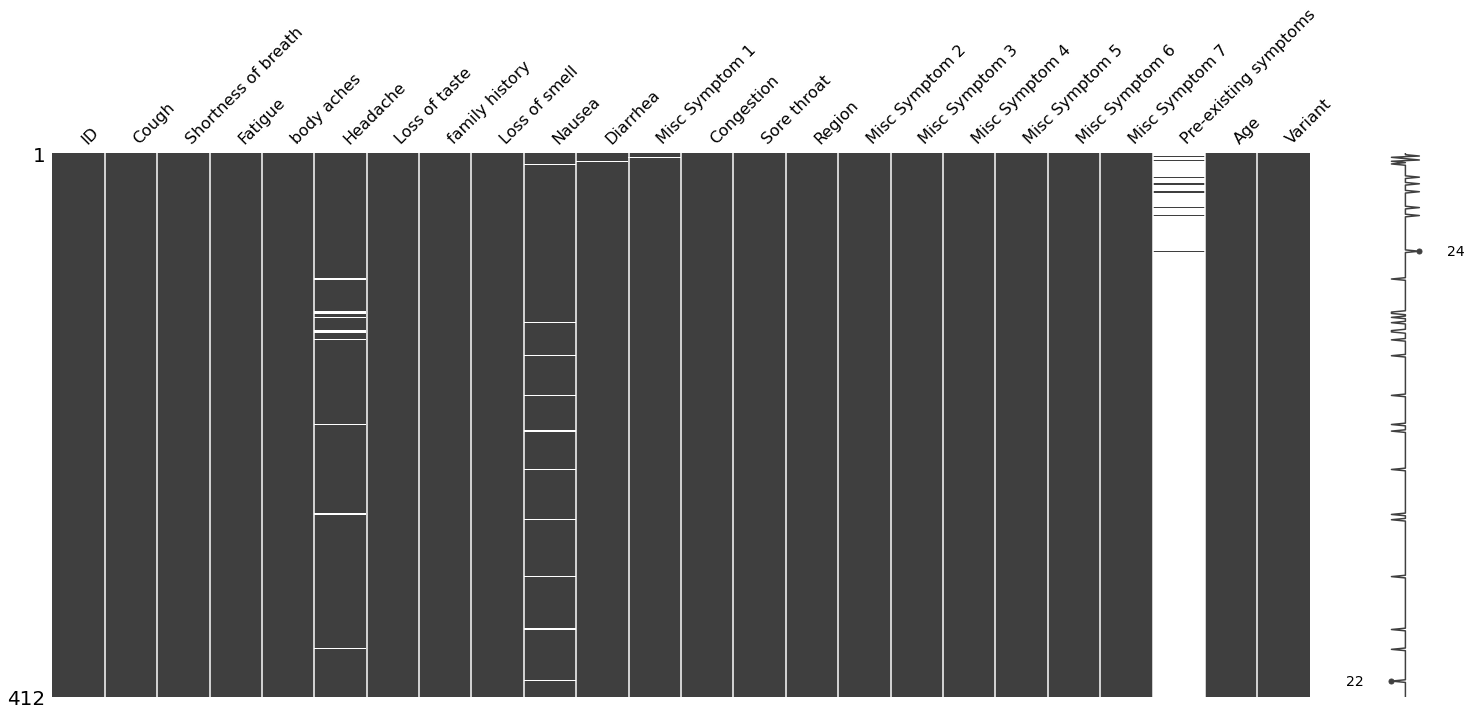

In [ ]:
#Visualize the missing values in the dataset 

msno.matrix(train)

As we can see the pre-existing symptoms columns is full empty which indicates the missing values in the dataset


**Pre-existing Symptoms**

In [ ]:
# Drop the Pre-existing symptoms column

train.drop(['Pre-existing symptoms'],axis=1,inplace=True)
train.shape

(412, 23)

I decided to drop the pre-existing symptoms columns since it had around than 99% entries as missing or NaN.

Now, we have 22 features and a target column in our dataframe


**Diarrhea**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


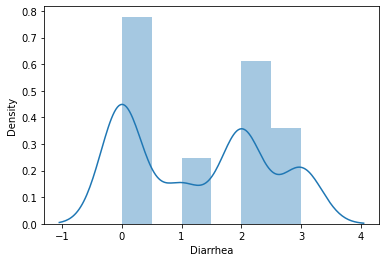

In [ ]:
#Visualising the distribution of the data

sns.distplot(train.Diarrhea)

In [ ]:
#Mean imputation

train.Diarrhea = train.Diarrhea.fillna(train.Diarrhea.mean())

Since, the curve appears to be normally distributed, the mean of the column is imputed as the value for the missing data


**Misc Symptom 1**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


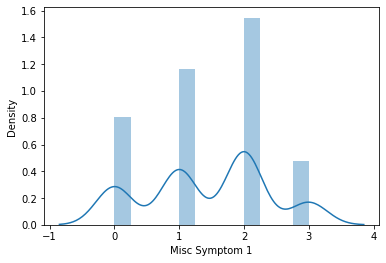

In [ ]:
#Visualising the distribution of the data

sns.distplot(train['Misc Symptom 1'])

In [ ]:
#Mean imputation

train['Misc Symptom 1'] = train['Misc Symptom 1'].fillna(train['Misc Symptom 1'].mean())

Since, the curve appears to be normally distributed, the mean of the column is imputed as the value for the missing data

**Headache**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


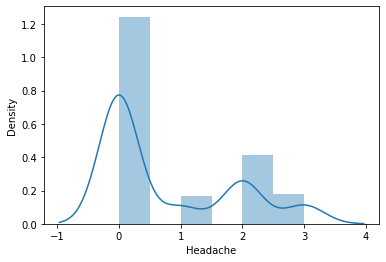

In [ ]:
#Visualising the distribution of the data

sns.distplot(train.Headache)

In [ ]:
#Median imputation

train.Headache = train.Headache.fillna(train.Headache.median())

Since, the data is skewed, we use the median value of the column to fill the missing values.

**Nausea**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


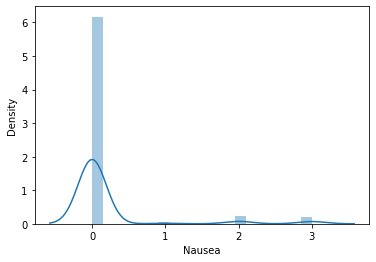

In [ ]:
#Visualising the distribution of the data

sns.distplot(train.Nausea)

In [ ]:
#Mode imputation

train.Nausea =  train.Nausea.fillna(train.Nausea.mode()[0])

As we can see in the above graph, the data is skewed to the left because of the high frequency of 0's in the column. Therefore, we impute the mode inplace of the missing values

In [ ]:
train.isna().sum()

ID                     0
Cough                  0
Shortness of breath    0
Fatigue                0
body aches             0
Headache               0
Loss of taste          0
family history         0
Loss of smell          0
Nausea                 0
Diarrhea               0
Misc Symptom 1         0
Congestion             0
Sore throat            0
Region                 0
Misc Symptom 2         0
Misc Symptom 3         0
Misc Symptom 4         0
Misc Symptom 5         0
Misc Symptom 6         0
Misc Symptom 7         0
Age                    0
Variant                0
dtype: int64

After all this processing, we can see that there are no missing values in our dataframe

# Statistical Analysis

In [ ]:
#getting the information about the dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   412 non-null    int64  
 1   Cough                412 non-null    int64  
 2   Shortness of breath  412 non-null    int64  
 3   Fatigue              412 non-null    int64  
 4   body aches           412 non-null    int64  
 5   Headache             412 non-null    float64
 6   Loss of taste        412 non-null    int64  
 7   family history       412 non-null    object 
 8   Loss of smell        412 non-null    int64  
 9   Nausea               412 non-null    float64
 10  Diarrhea             412 non-null    float64
 11  Misc Symptom 1       412 non-null    float64
 12  Congestion           412 non-null    int64  
 13  Sore throat          412 non-null    int64  
 14  Region               412 non-null    object 
 15  Misc Symptom 2       412 non-null    int

In [ ]:
#Mentioning the class numbers for the categorical target variable

var = {'Variant 1': 1,'Variant 2': 2,'Variant 3': 3,'Variant 4': 4,'Variant 5':5,'Variant 6': 6}

train.Variant = [var[item] for item in train.Variant]

In [ ]:
#Displaying the dataframe after replacing target class

train.head()

,ID,Cough,Shortness of breath,Fatigue,body aches,Headache,Loss of taste,family history,Loss of smell,Nausea,...,Sore throat,Region,Misc Symptom 2,Misc Symptom 3,Misc Symptom 4,Misc Symptom 5,Misc Symptom 6,Misc Symptom 7,Age,Variant
0,309,2,3,2,0,2.0,0,Yes,2,0.0,...,3,Americas,0,1,2,0,0,2,31,1
1,486,2,2,1,0,0.0,0,Yes,1,0.0,...,0,Europe,1,0,0,3,0,0,22,2
2,199,3,3,3,0,2.0,0,Yes,2,0.0,...,3,Europe,3,0,2,0,0,0,18,1
3,495,2,1,3,0,2.0,0,Yes,0,0.0,...,0,Europe,0,0,0,0,0,0,23,3
4,401,3,2,2,0,0.0,0,Yes,2,0.0,...,2,Americas,0,0,0,0,0,0,56,1


In [ ]:
#Finding the basic statistics of the column variables

train.describe()

,ID,Cough,Shortness of breath,Fatigue,body aches,Headache,Loss of taste,Loss of smell,Nausea,Diarrhea,...,Congestion,Sore throat,Misc Symptom 2,Misc Symptom 3,Misc Symptom 4,Misc Symptom 5,Misc Symptom 6,Misc Symptom 7,Age,Variant
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,...,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,290.992718,2.165049,1.941748,1.553398,0.094660,0.745146,0.701456,0.783981,0.169903,1.277372,...,0.905340,1.133495,0.398058,0.480583,0.604369,0.973301,0.058252,0.689320,37.308252,2.191748
std,166.180939,0.652110,0.698629,0.898533,0.428056,1.058209,1.011225,0.873751,0.631891,1.157205,...,1.139117,1.181423,0.755706,0.826632,0.982217,1.163837,0.329425,1.013573,14.135756,1.388037
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,153.750000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,1.000000
50%,288.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,2.000000
75%,428.250000,3.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000,0.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,49.250000,3.000000
max,587.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


In [ ]:
#Finding the correlation between the features and the target variable
train.corr()

,ID,Cough,Shortness of breath,Fatigue,body aches,Headache,Loss of taste,Loss of smell,Nausea,Diarrhea,...,Congestion,Sore throat,Misc Symptom 2,Misc Symptom 3,Misc Symptom 4,Misc Symptom 5,Misc Symptom 6,Misc Symptom 7,Age,Variant
ID,1.000000,-0.065077,0.027031,-0.009440,-0.052835,0.049480,0.082516,-0.003630,-0.041533,-0.035047,...,0.045458,0.056244,-0.050679,0.163134,0.053451,-0.052397,-0.000037,0.065914,0.019960,-0.052914
Cough,-0.065077,1.000000,0.298867,0.080428,-0.073539,0.071681,0.071215,0.152401,-0.239454,0.042362,...,0.034185,0.012387,0.039162,-0.007581,0.045215,0.105202,-0.010886,0.096174,-0.019258,-0.247404
Shortness of breath,0.027031,0.298867,1.000000,0.249152,-0.111692,0.223411,0.233624,0.222474,-0.313727,-0.141646,...,0.289616,0.165681,0.246800,0.170773,0.164893,-0.061765,-0.059224,0.190850,0.027938,-0.440084
Fatigue,-0.009440,0.080428,0.249152,1.000000,-0.104900,0.355960,0.270639,-0.048803,-0.144577,-0.345191,...,0.448288,0.340510,0.244528,0.286391,0.397552,-0.362755,-0.109174,0.015589,0.060862,-0.311586
body aches,-0.052835,-0.073539,-0.111692,-0.104900,1.000000,0.166187,-0.052594,-0.114333,0.039344,0.020544,...,-0.086366,-0.092405,-0.064115,-0.101373,-0.119040,-0.004682,0.806270,0.208147,-0.308825,0.415735
Headache,0.049480,0.071681,0.223411,0.355960,0.166187,1.000000,0.551727,0.216618,-0.178878,-0.566572,...,0.692452,0.572208,0.394908,0.446318,0.429455,-0.525116,0.133426,0.309370,-0.026778,-0.425494
Loss of taste,0.082516,0.071215,0.233624,0.270639,-0.052594,0.551727,1.000000,0.213221,-0.186968,-0.551327,...,0.712576,0.595541,0.401046,0.582466,0.409917,-0.517429,-0.079137,0.281982,0.018028,-0.534619
Loss of smell,-0.003630,0.152401,0.222474,-0.048803,-0.114333,0.216618,0.213221,1.000000,-0.241842,-0.178826,...,0.275198,0.192996,0.307415,0.157559,0.058938,-0.106177,-0.116784,0.102612,0.056229,-0.485363
Nausea,-0.041533,-0.239454,-0.313727,-0.144577,0.039344,-0.178878,-0.186968,-0.241842,1.000000,-0.111189,...,-0.214219,0.178132,-0.141974,-0.128752,-0.150167,-0.152622,-0.035973,-0.183307,-0.056270,0.523124
Diarrhea,-0.035047,0.042362,-0.141646,-0.345191,0.020544,-0.566572,-0.551327,-0.178826,-0.111189,1.000000,...,-0.689324,-0.757313,-0.396439,-0.531392,-0.402578,0.676252,0.072397,-0.247308,-0.009189,0.363678


As we can see in the correlation matrix, the Variant is positively fairly correlated with Nausea feature with a correlation coefficient of 0.53. All the other features are correlated weakly.

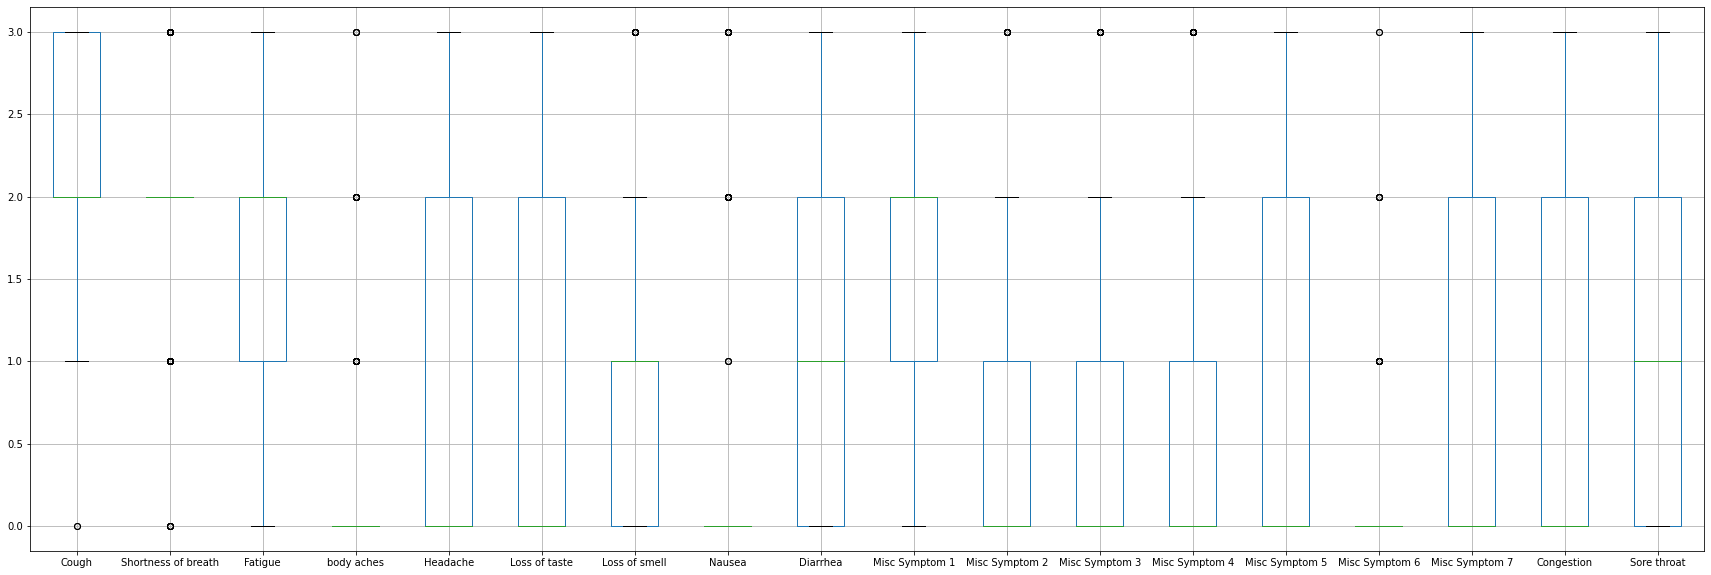

In [ ]:
a = ['Cough','Shortness of breath','Fatigue','body aches','Headache','Loss of taste','family history','Loss of smell','Nausea','Diarrhea','Misc Symptom 1','Misc Symptom 2','Misc Symptom 3','Misc Symptom 4','Misc Symptom 5','Misc Symptom 6','Misc Symptom 7','Congestion','Sore throat','Region']

plt.figure(figsize=(30,10))
train[a].boxplot()

From the above boxplot of the features, we can conclude that there are no outliers observed in this dataset

# Data cleaning


In [ ]:
train['Region'].value_counts()

Europe                238
Americas               90
East Mediterranean     57
Africa                 27
Name: Region, dtype: int64

In [ ]:
class1 = {
    'Yes': 0,
    'No': 1
}
class2 = {
    'Europe': 1,
    'Americas': 2,
    'East Mediterranean': 3,
    'Africa': 4
}

train['family history'] = [class1[item] for item in train['family history']]
train.Region = [class2[item] for item in train.Region]

In [ ]:
#Declaring the X (features) and y(target) variables
X_train = train[['Cough','Shortness of breath','Fatigue','body aches','Headache','Loss of taste','family history','Loss of smell','Nausea','Diarrhea','Misc Symptom 1','Misc Symptom 2','Misc Symptom 3','Misc Symptom 4','Misc Symptom 5','Misc Symptom 6','Misc Symptom 7','Congestion','Sore throat','Region','Age']].values
y_train = train['Variant'].values

# Data Modelling


**Random Forest**

In [ ]:
#Fitting the Random forest classifier

rf = RandomForestClassifier(max_features = 5, n_estimators=15,random_state=11)
rf.fit(X_train,y_train)

RandomForestClassifier(max_features=5, n_estimators=15, random_state=11)

In [ ]:
#Scoring the model
print("Score: ",rf.score(X_train,y_train))

Score:  1.0


In [ ]:
#Using param_grid and GridSearchCV to check for optimized parameters
param_grid = { 
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(rf,param_grid,cv=5)
CV_rfc.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features=5, n_estimators=15,
                                              random_state=11),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8]})

In [ ]:
#Displaying the best parameters

CV_rfc.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [ ]:
#Fitting the model using the obtained new parameters

rf_cv = RandomForestClassifier(max_features =5,max_depth = 8, n_estimators=15,random_state=21, criterion='entropy')
rf_cv.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features=5,
                       n_estimators=15, random_state=21)

In [ ]:
#Accuracy of the model

print("Score: ",rf_cv.score(X_train,y_train))

Score:  0.9733009708737864


# Testing data

In [ ]:
#Reading the test data
test_data = pd.read_csv("/content/Test.csv")
test_data.head()

,ID,Cough,Shortness of breath,Fatigue,body aches,Headache,Loss of taste,family history,Loss of smell,Nausea,...,Sore throat,Region,Misc Symptom 2,Misc Symptom 3,Misc Symptom 4,Misc Symptom 5,Misc Symptom 6,Misc Symptom 7,Pre-existing symptoms,Age
0,95,1,2,2,0,0,0,Yes,0,1,...,3,Europe,0,0,0,1,0,0,NaN,17
1,502,3,2,2,0,3,3,Yes,1,0,...,2,East Mediterranean,0,2,2,0,0,0,NaN,35
2,203,2,3,1,0,1,2,No,1,0,...,3,East Mediterranean,0,1,2,0,0,2,NaN,28
3,290,2,2,2,0,1,1,Yes,1,0,...,1,Africa,1,1,2,0,0,0,NaN,40
4,479,1,2,2,0,0,0,Yes,0,0,...,1,Europe,0,0,0,1,0,0,NaN,34


In [ ]:
class1 = {
    'Yes': 0,
    'No': 1
}
class2 = {
    'Europe': 1,
    'Americas': 2,
    'East Mediterranean': 3,
    'Africa': 4
}

test_data['family history'] = [class1[item] for item in test_data['family history']]
test_data.Region = [class2[item] for item in test_data.Region]

In [ ]:
#Declaring the X variable

X_test = test_data[['Cough','Shortness of breath','Fatigue','body aches','Headache','Loss of taste','family history','Loss of smell','Nausea','Diarrhea','Misc Symptom 1','Misc Symptom 2','Misc Symptom 3','Misc Symptom 4','Misc Symptom 5','Misc Symptom 6','Misc Symptom 7','Congestion','Sore throat','Region','Age']].values

In [ ]:
#Predicting the y variable

pred_y = rf_cv.predict(X_test)

In [ ]:
#Print predictions in the required format

data = {
    'ID': test_data['ID'],
    'Variant': pred_y
}
predictions = pd.DataFrame(data)

var = {1:'Variant 1',2:'Variant 2',3: 'Variant 3',4: 'Variant 4',5: 'Variant 5',6: 'Variant 6'}

predictions.Variant = [var[item] for item in predictions.Variant]

predictions

,ID,Variant
0,95,Variant 5
1,502,Variant 1
2,203,Variant 1
3,290,Variant 1
4,479,Variant 2
...,...,...
172,398,Variant 1
173,117,Variant 2
174,74,Variant 2
175,299,Variant 2


In [ ]:
#Export the predictions to a csv

predictions.to_csv('prediction.csv')